In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Excel data
# Change 'your_data.xlsx' and 'Sheet1' if needed
df = pd.read_excel(r"C:\Users\hp\Desktop\REG108S\Project\MatLab Data\power 20250503 to 20250504\PowerMeasuredInSimulink.xlsx", sheet_name='PowerGrid')

# Replace 'value' with the actual column name in your Excel file
data = df['Active Power'].values



In [2]:
# Check for 288 points
assert len(data) == 480001 # "Input data must contain exactly 288 points."

# Store hourly peaks
hourly_peaks = []

for i in range(24):
    chunk = data[i*20000:(i+1)*20000]
    peak = np.max(chunk)
    hourly_peaks.append(peak)

# Save to Excel
peak_df = pd.DataFrame({'hour': [f"{h:02}:00" for h in range(24)],
                        'peak_value': hourly_peaks})
peak_df.to_excel('3phaseLoadPeak.xlsx', index=False)



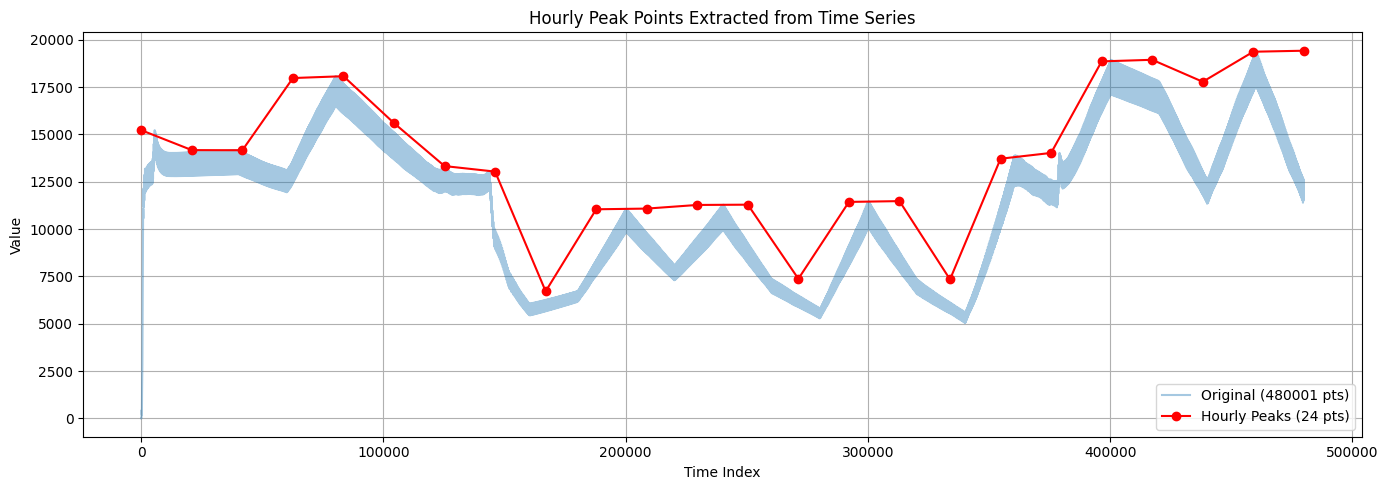

In [5]:
# Plot original vs peaks
plt.figure(figsize=(14, 5))
plt.plot(data, label='Original (480001 pts)', alpha=0.4)
plt.plot(np.linspace(0, 480001, 24), hourly_peaks, 'ro-', label='Hourly Peaks (24 pts)')
plt.title('Hourly Peak Points Extracted from Time Series')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()